In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import spacy
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import colorcet
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,12)

In [3]:
GRAPH = 'Results/Graphs'
TABLE = 'Results/Tables'
DATA = '../data/'

In [4]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v4.csv'))

In [5]:
df['TitleCode'] = LabelEncoder().fit_transform(df['ONET Title'])

In [7]:
nlp = spacy.load("en_core_web_lg")

In [10]:
vector_list = []
for context in tqdm((df['Job_Context'] + df['Job_Responsibility']).values):
    vector = nlp(str(context)).vector
    vector_list.append(vector)

100%|██████████| 28316/28316 [05:12<00:00, 90.64it/s] 


In [7]:
with open('../data/vector.npy','rb') as f:
    vector_list = np.load(f)

In [9]:
vector_list.shape

(28316, 768)

In [10]:
pca = PCA(n_components=2)
pca.fit(vector_list)
reduced = pca.transform(vector_list)

In [53]:
tsne = TSNE(3)
reduced = tsne.fit_transform(vector_list)

KeyboardInterrupt: 

In [18]:
colors = kmean(vector_list,5)

In [24]:
colorcet.fire

['#000000',
 '#060000',
 '#0d0000',
 '#120000',
 '#160000',
 '#190000',
 '#1c0000',
 '#1f0000',
 '#220000',
 '#240000',
 '#260000',
 '#280000',
 '#2b0000',
 '#2d0000',
 '#2e0000',
 '#300000',
 '#320000',
 '#340000',
 '#350000',
 '#370000',
 '#380000',
 '#3a0000',
 '#3b0000',
 '#3d0000',
 '#3e0000',
 '#400000',
 '#410000',
 '#430000',
 '#440000',
 '#460000',
 '#470000',
 '#490000',
 '#4a0000',
 '#4c0000',
 '#4d0000',
 '#4f0000',
 '#500000',
 '#520000',
 '#530000',
 '#550000',
 '#560000',
 '#580000',
 '#590100',
 '#5b0100',
 '#5d0100',
 '#5e0100',
 '#600100',
 '#610100',
 '#630100',
 '#650100',
 '#660100',
 '#680100',
 '#690100',
 '#6b0100',
 '#6d0100',
 '#6e0100',
 '#700100',
 '#710100',
 '#730100',
 '#750100',
 '#760100',
 '#780200',
 '#7a0200',
 '#7b0200',
 '#7d0200',
 '#7f0200',
 '#800200',
 '#820200',
 '#840200',
 '#850200',
 '#870200',
 '#890200',
 '#8a0200',
 '#8c0300',
 '#8e0300',
 '#900300',
 '#910300',
 '#930300',
 '#950300',
 '#960300',
 '#980300',
 '#9a0300',
 '#9c0300',
 '#9

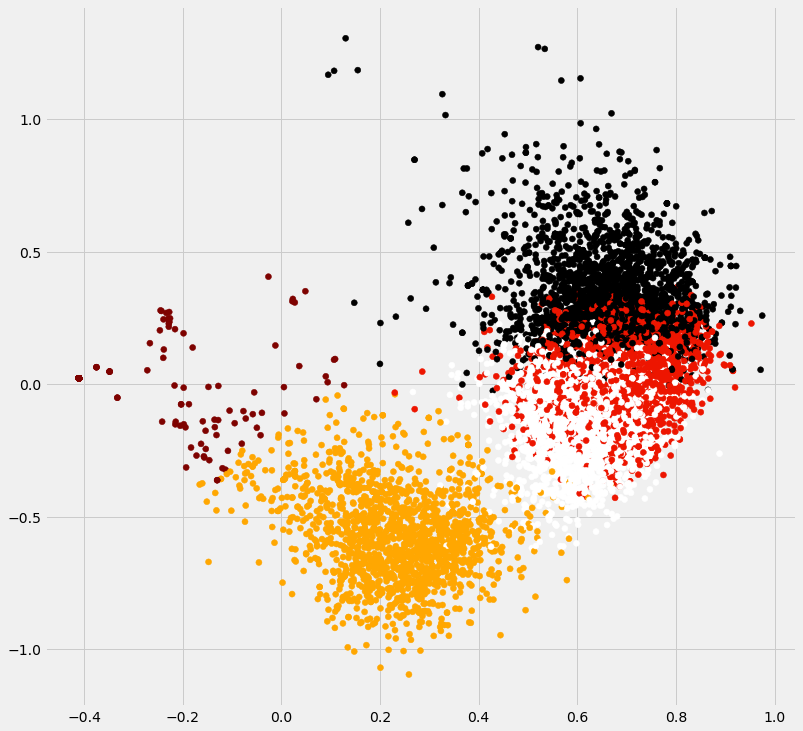

In [27]:
fig,ax = plt.subplots()
ax.scatter(reduced[:,0],reduced[:,1],c=colors,cmap=colorcet.cm.fire)

In [13]:
def kmean(data,n,seed=0):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=100, random_state=seed)
    pred_y = kmeans.fit_predict(data)
    return pred_y

In [57]:
def get_elbow(X,k):
    from sklearn.cluster import KMeans
    wcss = []
    for i in tqdm(range(1, k+1)):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, k+1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    

100%|██████████| 50/50 [15:18<00:00, 18.37s/it]


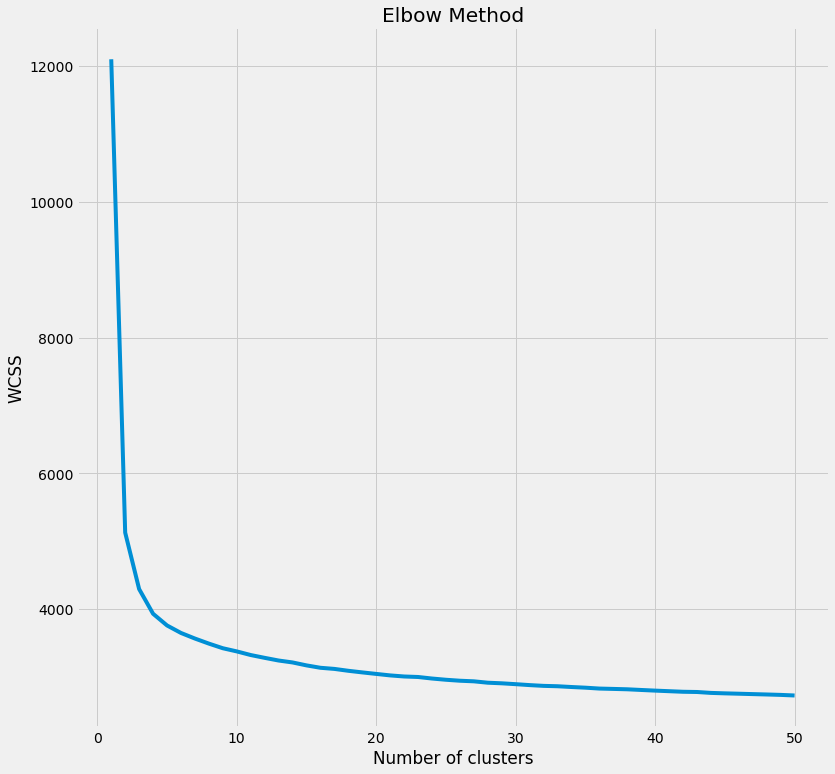

In [58]:
get_elbow(vector_list,50)

In [61]:
df['Cluster'] = kmean(vector_list,5)

In [64]:
df.groupby(['Cluster'])['JobTitle'].value_counts().to_csv('Test.csv')